# mnist 숫자 분류

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import sys

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

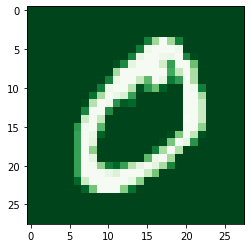

In [7]:
plt.imshow(X_train[1], cmap='Greens_r')
plt.show()

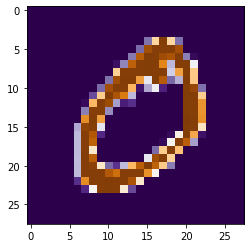

In [8]:
plt.imshow(X_train[1], cmap='PuOr_r')
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean'

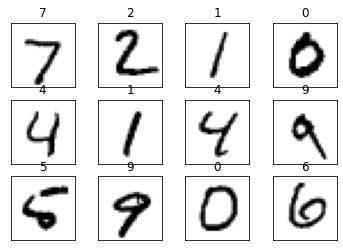

In [9]:
fig = plt.figure()  
for i in range(1, 13): 
    # 2x2 블록 영역의 i 위치(1부터 시작)
    subplot = fig.add_subplot(3, 4, i)
    # x,y축 지점 표시 안함
    subplot.set_xticks([])
    subplot.set_yticks([])
    # subplot 제목
    subplot.set_title('%i' % y_test[i-1])   # ('image %i' % i)
    # 입력으로 사용한 테스트 이미지를 28x28 구조로 재배열하고

    # 그레이스케일 이미지 출력
    subplot.imshow(X_test[i-1].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

# CNN 신경망 구조 실행
필요 라이브러리 로딩

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 32x3x3+32=320
CNN_model.add(Conv2D(64, (4,4), activation='relu'))  # parameter 갯수 : 64x4x4x32+64 =32832 
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, activation='softmax'))
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                        

In [14]:
# y를 one-hot-encoding 으로 변환하고 학습
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# y를 one-hot-encoding 으로 변환하지 않고 학습
# CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
modelpath = './models/ch14-mnist_cnn_best.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
history = CNN_model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200,  \
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
222/225 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9975
Epoch 1: val_loss did not improve from 0.03919
225/225 [==============================] - 3s 13ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0589 - val_accuracy: 0.9881
Epoch 2/30
221/225 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9971
Epoch 2: val_loss did not improve from 0.03919
225/225 [==============================] - 3s 12ms/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9974
Epoch 3: val_loss did not improve from 0.03919
225/225 [==============================] - 3s 13ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0437 - val_accuracy: 0.9895
Epoch 4/30
221/225 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9978
Epoch 4: val_loss did not improve from 0.03919
225/225 [=======================

In [19]:
print("Test Accuracy: %.4f" % (CNN_model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

313/313 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9913
Test Accuracy: 0.9913


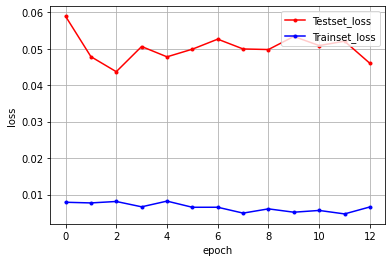

In [20]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 내가쓴 손글씨

In [24]:
import numpy as np
from PIL import Image
import os

In [31]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, '/content/4.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

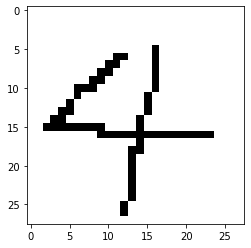

In [32]:
try:
  image = np.mean(image, axis=2)
except:
  pass

# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')

In [33]:
image = ((image / 255.) - 1) * -1

test_data2 = np.reshape(image, (1, 28, 28))

In [34]:
print(CNN_model.predict(test_data2))
print("모델의 예측값 : ", np.argmax(CNN_model.predict(test_data2)))

1/1 [==============================] - 0s 15ms/step
[[4.5946023e-15 7.6716191e-08 4.0972989e-09 9.1671284e-16 9.9996841e-01
  6.0924607e-14 8.5482294e-15 3.1454478e-05 5.9763470e-09 1.6741620e-08]]
1/1 [==============================] - 0s 13ms/step
모델의 예측값 :  4


In [35]:
from tensorflow.keras.models import load_model
modelpath = './models/ch14-mnist_cnn_best.hdf5'
loaded_model = load_model(modelpath)

In [36]:
print(loaded_model.predict(test_data2))
print("모델의 예측값 : ", np.argmax(loaded_model.predict(test_data2)))

1/1 [==============================] - 0s 58ms/step
[[2.1765154e-06 3.2162294e-03 1.0148927e-03 1.9683443e-06 9.5128566e-01
  1.9178176e-06 6.3882243e-07 4.2777613e-02 1.4164877e-03 2.8247901e-04]]
1/1 [==============================] - 0s 16ms/step
모델의 예측값 :  4
